# Movies Data (K-Means Clustering)

K-Means clustering algorithm is used to find similar type of data and thier respective centres. we decide number of clusters and
similar type of data gets divided into those clusters or groups.

In this dataset, we have given data of movies and we have to find out cluster centres when we plot 'facebook likes'. cluster centres
are the points from where points of that group has least distance or in other words where points are more dense, hence, we know
where the most facebook likes are.

let's check out the sample dataset.

## Data Columns/Features:
    1. color 
    2. director_name 
    3. num_critic_for_reviews 
    4. duration
    5. director_facebook_likes 
    6. actor_3_facebook_likes 
    7. actor_2_name
    8. actor_1_facebook_likes 
    9. gross 
    10. genres 
    11. actor_1_name
    12. movie_title 
    13. num_voted_users 
    14. cast_total_facebook_likes
    15. actor_3_name 
    16. facenumber_in_poster 
    17. plot_keywords
    18. movie_imdb_link 
    19. num_user_for_reviews 
    20. language 
    21. country
    22. content_rating 
    23. budget 
    24. title_year 
    25. actor_2_facebook_likes
    26. imdb_score 
    27. aspect_ratio 
    28. movie_facebook_likes

## Overview
1. Importing useful libraries and loading data in
2. Preliminary EDA: Exploratory data analysis
3. Split, train and predict/infer on our test set
4. Evaluate the model's performance
5. Visualize the model's decision boundary
6. Key take aways
7. Conclusion

# 1. Importing useful libraries and loading data in

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/hpp/Documents/Python/machine learning/kmeans clustering/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

# 2. Preliminary EDA: Exploratory data analysis

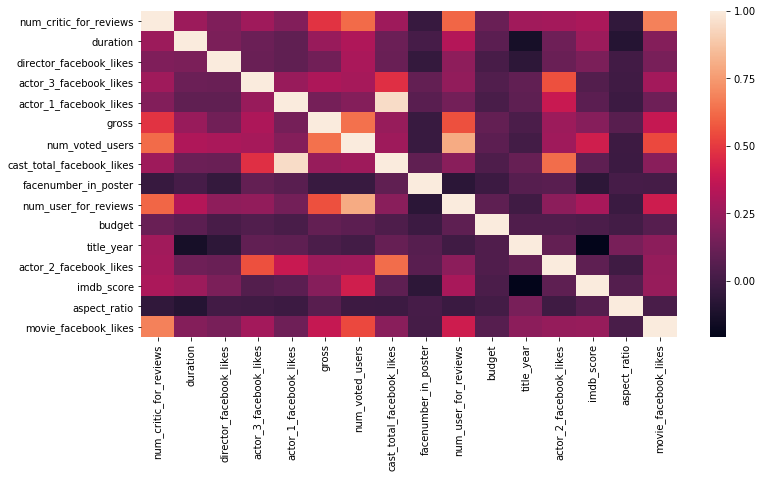

In [11]:
sns.heatmap(df.corr())
from pylab import rcParams
rcParams['figure.figsize']=12,6

In [12]:
newdata = df.iloc[:,4:6]
newdata.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


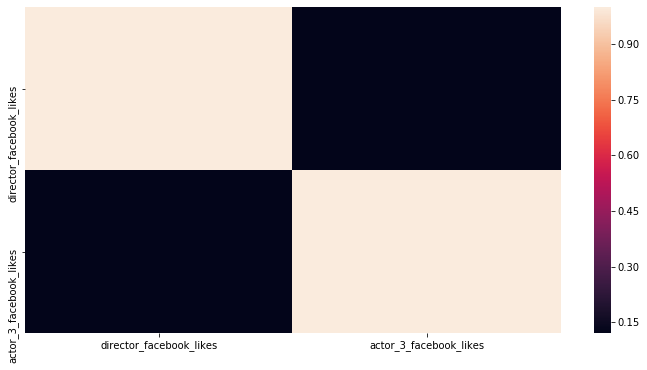

In [13]:
sns.heatmap(newdata.corr())

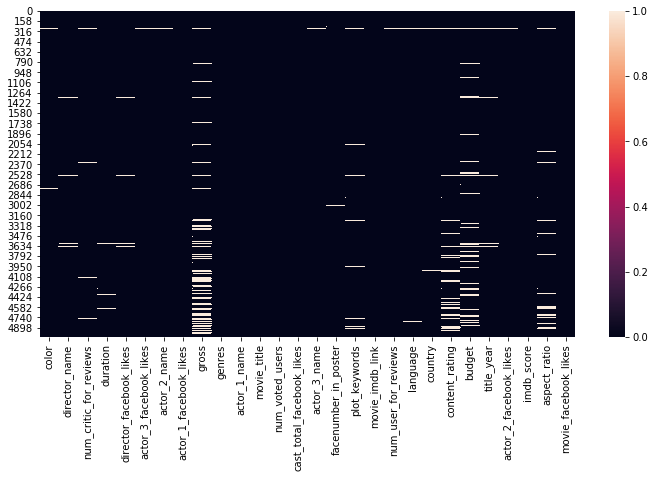

In [18]:
sns.heatmap(df.isnull())

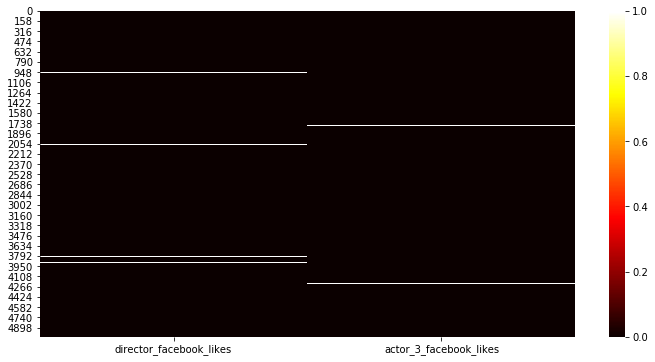

In [28]:
sns.heatmap(newdata.isnull(),cmap='hot')

# 3. Split, train and predict/infer on our test set

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=5)

In [32]:
newdata = df.iloc[:,4:6]
newdata.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


In [33]:
newdata=newdata.dropna()

In [34]:
newdata.isnull().sum()

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

# 4. Evaluate the model's performance

In [35]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans.cluster_centers_

array([[  153.94452806,   424.19264674],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [12490.38461538,   605.93269231]])

In [37]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
dataab = {'a': [153.94452806,17621.21212121,210.77011494,12490.38461538,17545.45454545],
         'b' : [424.19264674, 596.10606061, 11126.43678161, 605.93269231, 14545.45454545]}
df1 = pd.DataFrame(dataab)
df1.head()

,a,b
0,153.944528,424.192647
1,17621.212121,596.106061
2,210.770115,11126.436782
3,12490.384615,605.932692
4,17545.454545,14545.454545


# 5. Visualize the model's decision boundary

C:\Users\hpp\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


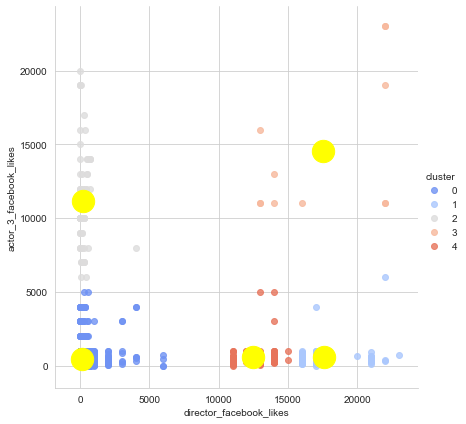

In [39]:
# plotting the clusters

newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', data=newdata,hue = 'cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)
plt.scatter(df1['a'],df1['b'], color='yellow',s=500)

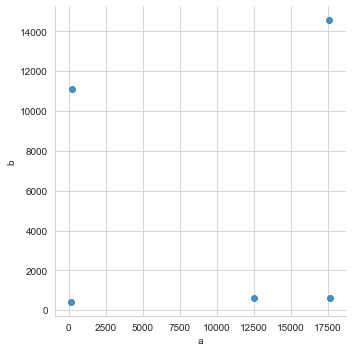

In [40]:
sns.lmplot('a','b',data=df1,fit_reg=False)

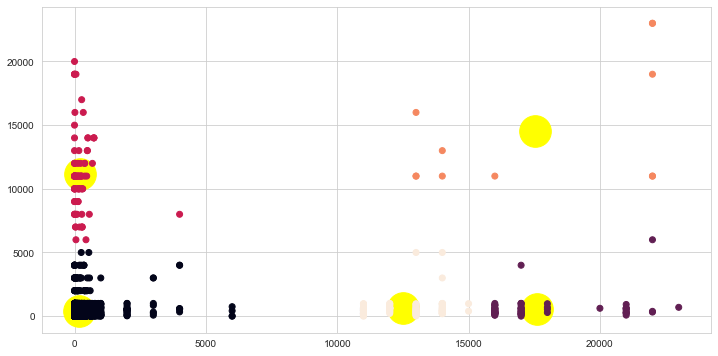

In [43]:
plt.scatter(df1['a'],df1['b'], color='yellow',s=1000)
plt.scatter(newdata['director_facebook_likes'],newdata['actor_3_facebook_likes'],c=newdata.cluster)

# 7. Conclusion

In [42]:
kmeans.cluster_centers_

array([[  153.94452806,   424.19264674],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [12490.38461538,   605.93269231]])

These are the cluster centres where the facebook like density is high and that's what we need to find.

thank you!